In [3]:
lst = [1.234234, 4.238, 8.3435345, 5, 2, 3, 12]


In [2]:
min(lst)

1.234234

In [4]:
max(lst)

12

In [1]:
import numpy as np   

In [9]:
nx, ny = (3, 2)

x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)

In [10]:
x

array([0. , 0.5, 1. ])

In [11]:
y

array([0., 1.])

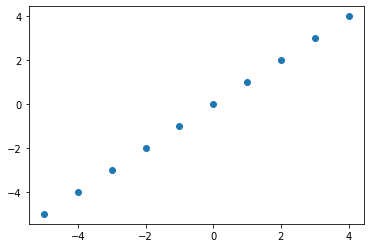

In [5]:
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
xx, yy = np.meshgrid(x, y, sparse=True)

h = plt.scatter(x,y)
plt.show()

In [14]:
z

array([[-0.0052475 , -0.00386885,  0.01556126, -0.02288393,  0.02932917,
        -0.00529407,  0.02932917, -0.02288393,  0.01556126, -0.00386885],
       [-0.00386885,  0.01723208, -0.00529407,  0.04564726, -0.05655279,
        -0.01799396, -0.05655279,  0.04564726, -0.00529407,  0.01723208],
       [ 0.01556126, -0.00529407, -0.04172151,  0.03232054, -0.05440211,
         0.04579094, -0.05440211,  0.03232054, -0.04172151, -0.00529407],
       [-0.02288393,  0.04564726,  0.03232054,  0.12366978, -0.19178485,
        -0.18920062, -0.19178485,  0.12366978,  0.03232054,  0.04564726],
       [ 0.02932917, -0.05655279, -0.05440211, -0.19178485,  0.45464871,
         0.84147098,  0.45464871, -0.19178485, -0.05440211, -0.05655279],
       [-0.00529407, -0.01799396,  0.04579094, -0.18920062,  0.84147098,
                nan,  0.84147098, -0.18920062,  0.04579094, -0.01799396],
       [ 0.02932917, -0.05655279, -0.05440211, -0.19178485,  0.45464871,
         0.84147098,  0.45464871, -0.19178485

In [1]:
from scipy import spatial

import sys
import math
import csv
import random
import json 
import time

import math
import numpy
import scipy.spatial
import startin 

try:
    jparams = json.load(open('params.json'))
except:
    print("ERROR: something is wrong with the params.json file.")
    sys.exit()
#-- store the input 3D points in list
list_pts_3d = []
with open(jparams['input-file']) as csvfile:
    r = csv.reader(csvfile, delimiter=' ')
    header = next(r)
    for line in r:
        p = list(map(float, line)) #-- convert each str to a float
        assert(len(p) == 3)
        list_pts_3d.append(p)
j_nn = jparams['nn']

def bbox(point_list, cell_size=1):
    # split the list of 3d points in lists for x and y 
    x_list = []
    y_list = []
    for points in point_list: 
        x = points[0]
        x_list.append(x)
        y = points[1]
        y_list.append(y)
    # find the lower left and upper right coordinate
    min_coordinate = (min(x_list), min(y_list))
    max_coordinate = (max(x_list), max(y_list))

    # find first 
    height_bb = max_coordinate[1] - min_coordinate[1]
    width_bb = max_coordinate[0] - min_coordinate[0]

    if height_bb % cell_size == 0 and width_bb % cell_size == 0:
        return min_coordinate, max_coordinate
    elif height_bb % cell_size == 0 and width_bb % cell_size != 0:
        num_cells_x = max_coordinate[0] // cell_size
        new_width = (num_cells_x + 1) * cell_size 
        new_max_x = min_coordinate[0] + new_width
        max_coordinate_new = (new_max_x, max_coordinate[1])
        return min_coordinate, max_coordinate_new
    elif height_bb % cell_size != 0 and width_bb % cell_size == 0:
        num_cells_y = max_coordinate[1] // cell_size
        new_width = (num_cells_y + 1) * cell_size 
        new_max_y = min_coordinate[1] + new_width
        max_coordinate_new = (max_coordinate, new_max_y)
        return min_coordinate, max_coordinate_new
    else: 
        num_cells_x = max_coordinate[0] // cell_size
        new_width = (num_cells_x + 1) * cell_size 
        new_max_x = min_coordinate[0] + new_width
        num_cells_y = max_coordinate[1] // cell_size
        new_width = (num_cells_y + 1) * cell_size 
        new_max_y = min_coordinate[1] + new_width
        max_coordinate_new = (new_max_x, new_max_y)
        return min_coordinate, max_coordinate_new

def gridding2D():
    min_coordinate, max_coordinate = bbox(list_pts_3d, j_nn['cellsize']) 
    x_axis = []
    y_axis = []
    for i in numpy.arange(min_coordinate[0], max_coordinate[0] + j_nn['cellsize'], j_nn['cellsize']):
        if i <= max_coordinate[0]:
            x_axis.append(i)
            #print('x axis', x_axis)
    for i in numpy.arange(min_coordinate[1], max_coordinate[1] + j_nn['cellsize'], j_nn['cellsize']):
        if i <= max_coordinate[1]:
            y_axis.append(i)
            #print('y axis', y_axis)
    grid = numpy.meshgrid(x_axis, y_axis)
    return grid

def gridding3D():
    min_coordinate, max_coordinate = bbox(list_pts_3d, j_nn['cellsize']) 
    x_axis = []
    y_axis = []
    z-axis = []
    for i in numpy.arange(min_coordinate[0], max_coordinate[0] + j_nn['cellsize'], j_nn['cellsize']):
        if i <= max_coordinate[0]:
            x_axis.append(i)
            #print('x axis', x_axis)
    for i in numpy.arange(min_coordinate[1], max_coordinate[1] + j_nn['cellsize'], j_nn['cellsize']):
        if i <= max_coordinate[1]:
            y_axis.append(i)
            #print('y axis', y_axis)
    grid = numpy.meshgrid(x_axis, y_axis)
    return grid

In [2]:
X, Y = gridding()

Yt = Y.transpose()

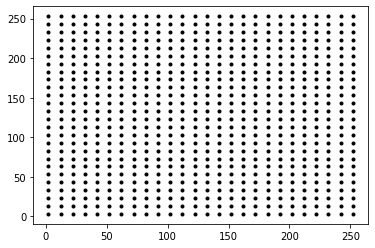

In [6]:
from matplotlib import pyplot as plt
plt.plot(X,Y,  marker='.', color='k', linestyle='none')

In [4]:
X

array([[  2.,  12.,  22.,  32.,  42.,  52.,  62.,  72.,  82.,  92., 102.,
        112., 122., 132., 142., 152., 162., 172., 182., 192., 202., 212.,
        222., 232., 242., 252.],
       [  2.,  12.,  22.,  32.,  42.,  52.,  62.,  72.,  82.,  92., 102.,
        112., 122., 132., 142., 152., 162., 172., 182., 192., 202., 212.,
        222., 232., 242., 252.],
       [  2.,  12.,  22.,  32.,  42.,  52.,  62.,  72.,  82.,  92., 102.,
        112., 122., 132., 142., 152., 162., 172., 182., 192., 202., 212.,
        222., 232., 242., 252.],
       [  2.,  12.,  22.,  32.,  42.,  52.,  62.,  72.,  82.,  92., 102.,
        112., 122., 132., 142., 152., 162., 172., 182., 192., 202., 212.,
        222., 232., 242., 252.],
       [  2.,  12.,  22.,  32.,  42.,  52.,  62.,  72.,  82.,  92., 102.,
        112., 122., 132., 142., 152., 162., 172., 182., 192., 202., 212.,
        222., 232., 242., 252.],
       [  2.,  12.,  22.,  32.,  42.,  52.,  62.,  72.,  82.,  92., 102.,
        112., 122., 1

In [5]:
Y

array([[  3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
          3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
          3.,   3.,   3.,   3.],
       [ 13.,  13.,  13.,  13.,  13.,  13.,  13.,  13.,  13.,  13.,  13.,
         13.,  13.,  13.,  13.,  13.,  13.,  13.,  13.,  13.,  13.,  13.,
         13.,  13.,  13.,  13.],
       [ 23.,  23.,  23.,  23.,  23.,  23.,  23.,  23.,  23.,  23.,  23.,
         23.,  23.,  23.,  23.,  23.,  23.,  23.,  23.,  23.,  23.,  23.,
         23.,  23.,  23.,  23.],
       [ 33.,  33.,  33.,  33.,  33.,  33.,  33.,  33.,  33.,  33.,  33.,
         33.,  33.,  33.,  33.,  33.,  33.,  33.,  33.,  33.,  33.,  33.,
         33.,  33.,  33.,  33.],
       [ 43.,  43.,  43.,  43.,  43.,  43.,  43.,  43.,  43.,  43.,  43.,
         43.,  43.,  43.,  43.,  43.,  43.,  43.,  43.,  43.,  43.,  43.,
         43.,  43.,  43.,  43.],
       [ 53.,  53.,  53.,  53.,  53.,  53.,  53.,  53.,  53.,  53.,  53.,
         53.,  53.,  

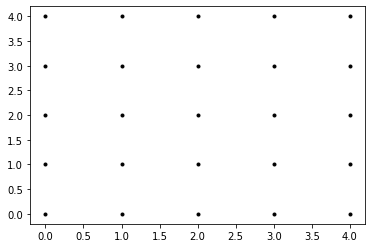

In [23]:
xvalues = np.array([0, 1, 2, 3, 4])
yvalues = np.array([0, 1, 2, 3, 4])

xx, yy = np.meshgrid(xvalues, yvalues)

plt.plot(xx, yy, marker='.', color='k', linestyle='none')

In [35]:
xx

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [36]:
yy

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [2]:
from scipy import spatial
import numpy as np
x, y = np.mgrid[0:5, 2:8]
tree = spatial.KDTree(list(zip(x.ravel(), y.ravel())))
tree.data


array([[0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [0, 7],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [1, 7],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [2, 7],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 6],
       [3, 7],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 6],
       [4, 7]])

In [3]:
list(zip(x.ravel(), y.ravel()))

[(0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7)]

In [15]:
from scipy import spatial

import sys
import math
import csv
import random
import json 
import time

import math
import numpy
import scipy.spatial
import startin 

from matplotlib import pyplot as plt

try:
    jparams = json.load(open('params.json'))
except:
    print("ERROR: something is wrong with the params.json file.")
    sys.exit()
#-- store the input 3D points in list
list_pts_3d = []
with open(jparams['input-file']) as csvfile:
    r = csv.reader(csvfile, delimiter=' ')
    header = next(r)
    for line in r:
        p = list(map(float, line)) #-- convert each str to a float
        assert(len(p) == 3)
        list_pts_3d.append(p)

def split_xyz(point_list3d):
    x_list = []
    y_list = []
    z_list = []
    for points in point_list3d: 
        x = points[0]
        x_list.append(x)
        y = points[1]
        y_list.append(y)
        z = points[2]
        z_list.append(z)
    return x_list, y_list, z_list

def bbox(point_list, cell_size=1):
    x_list, y_list, _ = split_xyz(point_list)
    
    min_coordinate = (min(x_list), min(y_list))
    max_coordinate = (max(x_list), max(y_list))

    height_bb = max_coordinate[1] - min_coordinate[1]
    width_bb = max_coordinate[0] - min_coordinate[0]

    if height_bb % cell_size == 0 and width_bb % cell_size == 0:
        return min_coordinate, max_coordinate
    elif height_bb % cell_size == 0 and width_bb % cell_size != 0:
        num_cells_x = max_coordinate[0] // cell_size
        new_width = (num_cells_x + 1) * cell_size 
        new_max_x = min_coordinate[0] + new_width
        max_coordinate_new = (new_max_x, max_coordinate[1])
        return min_coordinate, max_coordinate_new
    elif height_bb % cell_size != 0 and width_bb % cell_size == 0:
        num_cells_y = max_coordinate[1] // cell_size
        new_width = (num_cells_y + 1) * cell_size 
        new_max_y = min_coordinate[1] + new_width
        max_coordinate_new = (max_coordinate, new_max_y)
        return min_coordinate, max_coordinate_new
    else: 
        num_cells_x = max_coordinate[0] // cell_size
        new_width = (num_cells_x + 1) * cell_size 
        new_max_x = min_coordinate[0] + new_width
        num_cells_y = max_coordinate[1] // cell_size
        new_width = (num_cells_y + 1) * cell_size 
        new_max_y = min_coordinate[1] + new_width
        max_coordinate_new = (new_max_x, new_max_y)
        return min_coordinate, max_coordinate_new


/Users/louisespekking/Documents/Geomatics/GEO1015/HW01/hw/01/other-samples/tasmania/

In [5]:
print(jparams['nn']['cellsize'])

j_nn = jparams['nn']

0.1


In [5]:
cellsize = j_nn['cellsize']

In [6]:
box = bbox(list_pts_3d, cell_size=1)

In [7]:
box

((505011.47, 5258286.13), (1028371.47, 10526668.129999999))

In [ ]:
def gridding():
    min_coordinate, max_coordinate = bbox(list_pts_3d, j_nn['cellsize']) 
    x_axis = numpy.arange(min_coordinate[0], max_coordinate[0] + j_nn['cellsize'], j_nn['cellsize'])
    y_axis = numpy.arange(min_coordinate[1], max_coordinate[1] + j_nn['cellsize'], j_nn['cellsize'])
    grid = numpy.meshgrid(x_axis, y_axis, sparse=True)
    return grid

In [ ]:
min_coordinate, max_coordinate = bbox(list_pts_3d, j_nn['cellsize'])
print(numpy.arange(min_coordinate[0], max_coordinate[0] + j_nn['cellsize'], j_nn['cellsize']))

In [10]:
x, y, z = split_xyz(list_pts_3d)

In [18]:
def gridding():
    min_coordinate, max_coordinate = bbox(list_pts_3d, j_nn['cellsize']) 
    x_axis = numpy.arange(min_coordinate[0], max_coordinate[0] + j_nn['cellsize'], j_nn['cellsize'])
    y_axis = numpy.arange(min_coordinate[1], max_coordinate[1] + j_nn['cellsize'], j_nn['cellsize'])
    x_grid, y_grid = numpy.meshgrid(x_axis, y_axis, sparse=True)
    ncols = (max_coordinate[0] - min_coordinate[0]) / j_nn['cellsize'] 
    nrows = (max_coordinate[1] - min_coordinate[1]) / j_nn['cellsize'] 
    return x_grid, y_grid, ncols, nrows

In [19]:


c, y_grid, ncols, nrows = gridding()

In [26]:
x_axis = numpy.arange(min_coordinate[0], max_coordinate[0] + j_nn['cellsize'], j_nn['cellsize'])
y_axis = numpy.arange(min_coordinate[1], max_coordinate[1] + j_nn['cellsize'], j_nn['cellsize'])

In [31]:
from scipy import spatial

import sys
import math
import csv
import random
import json 
import time

import math
import numpy
import scipy.spatial
import startin 

from matplotlib import pyplot as plt

try:
    jparams = json.load(open('params.json'))
except:
    print("ERROR: something is wrong with the params.json file.")
    sys.exit()
#-- store the input 3D points in list
list_pts_3d = []
with open(jparams['input-file']) as csvfile:
    r = csv.reader(csvfile, delimiter=' ')
    header = next(r)
    for line in r:
        p = list(map(float, line)) #-- convert each str to a float
        assert(len(p) == 3)
        list_pts_3d.append(p)


print(jparams['nn']['cellsize'])

j_nn = jparams['nn']

def nn_interpolation(list_pts_3d, j_nn):
  
    print("File written to", j_nn['output-file'])

def split_xyz(point_list3d):
    x_list = []
    y_list = []
    z_list = []
    for points in point_list3d: 
        x = points[0]
        x_list.append(x)
        y = points[1]
        y_list.append(y)
        z = points[2]
        z_list.append(z)
    return x_list, y_list, z_list

def bbox(point_list, cell_size=1):
    x_list, y_list, _ = split_xyz(point_list)
    
    min_coordinate = (min(x_list), min(y_list))
    print('min_coordinate', min_coordinate)
    max_coordinate = (max(x_list), max(y_list))
    print('max_coordinate', max_coordinate)

    height_bb = max_coordinate[1] - min_coordinate[1]
    print('height', height_bb)
    width_bb = max_coordinate[0] - min_coordinate[0]
    print('width', width_bb)

    if height_bb % cell_size == 0 and width_bb % cell_size == 0:
        print('previous min', min_coordinate)
        print('prevois max', max_coordinate)
        return min_coordinate, max_coordinate
    elif height_bb % cell_size == 0 and width_bb % cell_size != 0:
        num_cells_x = max_coordinate[0] // cell_size
        new_width = (num_cells_x + 1) * cell_size 
        new_max_x = min_coordinate[0] + new_width
        max_coordinate_new = (new_max_x, max_coordinate[1])
        print('width not the same')
        return min_coordinate, max_coordinate_new
    elif height_bb % cell_size != 0 and width_bb % cell_size == 0:
        num_cells_y = max_coordinate[1] // cell_size
        new_width = (num_cells_y + 1) * cell_size 
        new_max_y = min_coordinate[1] + new_width
        max_coordinate_new = (max_coordinate, new_max_y)
        print('height not the same')
        return min_coordinate, max_coordinate_new
    else: 
        num_cells_x = max_coordinate[0] // cell_size
        print('num cells x', num_cells_x)
        remainder = max_coordinate[0] % cell_size
        to_add = cell_size - remainder
        new_width = max_coordinate[0] + to_add
        print('new width', new_width)
        new_max_x = min_coordinate[0] + new_width
        print('new_max_x', new_max_x)
        num_cells_y = max_coordinate[1] // cell_size
        new_width = (num_cells_y + 1) * cell_size 
        new_max_y = min_coordinate[1] + new_width
        max_coordinate_new = (new_max_x, new_max_y)
        print('both not the same')
        return min_coordinate, max_coordinate_new

bounding_box = bbox(list_pts_3d, j_nn['cellsize'])

def gridding():
    min_coordinate, max_coordinate = bbox(list_pts_3d, j_nn['cellsize']) 
    x_axis = numpy.arange(min_coordinate[0], max_coordinate[0] + j_nn['cellsize'], j_nn['cellsize'])
    y_axis = numpy.arange(min_coordinate[1], max_coordinate[1] + j_nn['cellsize'], j_nn['cellsize'])
    #x_grid, y_grid = numpy.meshgrid(x_axis, y_axis, sparse=True)
    return x_axis, y_axis

ncols = int(max(x_list_points)/j_nn['cellsize'])
nrows = int(max(y_list_points)/j_nn['cellsize'])

x_list_points, y_list_points, z_list_points = split_xyz(list_pts_3d)

yrange = reversed(range(int(min(y_list_points)), int(max(y_list_points)), j_nn['cellsize']))
xrange = (range(int(min(x_list_points)), int(max(x_list_points)), j_nn['cellsize']))

coordinates = [[i, j] for j in yrange for i in xrange]

zip_list = list(zip(x_list_points, y_list_points))
tree = spatial.KDTree(zip_list)

#z_rast = numpy.zeros((x_axis.shape[0], y_axis.shape[0]))
z_val_list= []

with open('test.asc', 'w') as fh:
    fh.write('NCOLS {}\n'.format(x_axis.shape[0]))
    fh.write('NROWS {}\n'.format(y_axis.shape[0]))
    fh.write('XLLCORNER {}\n'.format(bounding_box[0][0]))
    fh.write('YLLCORNER {}\n'.format(bounding_box[0][1]))
    fh.write('CELLSIZE {}\n'.format(j_nn['cellsize']))
    fh.write('NODATA_VALUE -9999\n')

    for query_point in coordinates:
            d, i_nn = tree.query(query_point, k=1)
            z_value = z_list_points[i_nn]
            z_val_list.append(z_value)

    for line in z_rast:
       numpy.savetxt(fh, line, fmt='%.4f')



2000
min_coordinate (587311.826320024, 137646.940111098)
max_coordinate (690183.330794893, 252644.538752491)
height 114997.59864139301
width 102871.504474869
num cells x 345.0
new width 692000.0
new_max_x 1279311.826320024
both not the same


In [39]:
ncols = int(max(x_list_points)/j_nn['cellsize'])
nrows = int(max(y_list_points)/j_nn['cellsize'])

x_list_points, y_list_points, z_list_points = split_xyz(list_pts_3d)

yrange = reversed(range(int(min(y_list_points)), int(max(y_list_points)) + j_nn['cellsize'], j_nn['cellsize']))
xrange = (range(int(min(x_list_points)), int(max(x_list_points)) + j_nn['cellsize'], j_nn['cellsize']))

coordinates = [[i, j] for j in yrange for i in xrange]

zip_list = list(zip(x_list_points, y_list_points))
tree = spatial.KDTree(zip_list)

#z_rast = numpy.zeros((x_axis.shape[0], y_axis.shape[0]))
z_val_list= []

with open('test.asc', 'w') as fh:
    fh.write('NCOLS {}\n'.format(ncols))
    fh.write('NROWS {}\n'.format(nrows))
    fh.write('XLLCORNER {}\n'.format(bounding_box[0][0]))
    fh.write('YLLCORNER {}\n'.format(bounding_box[0][1]))
    fh.write('CELLSIZE {}\n'.format(j_nn['cellsize']))
    fh.write('NODATA_VALUE -9999\n')

    for query_point in coordinates:
            d, i_nn = tree.query(query_point, k=1)
            z_value = z_list_points[i_nn]
            z_val_list.append(z_value)
            z_array = numpy.array(z_val_list)
    
    numpy.savetxt(fh, z_array, fmt='%.4f')

In [40]:
xrange

range(587311, 692183, 2000)

In [72]:
hull = spatial.ConvexHull(zip_list)

In [76]:
A = hull.equations[:,0:-1]
b = numpy.transpose(numpy.array([hull.equations[:,-1]]))
isInHull = numpy.all((A @ numpy.transpose(P)) <= numpy.tile(-b,(1,len(P))),axis=0)

NameError: name 'P' is not defined

In [86]:
from scipy.spatial import ConvexHull
points = numpy.array(zip_list)   
hull = ConvexHull(points)

In [18]:
yrange = reversed(range(int(min(y_list_points)), int(max(y_list_points)), j_nn['cellsize']))
xrange = (range(int(min(x_list_points)), int(max(x_list_points)), j_nn['cellsize']))

coordinates = [[i, j] for j in yrange for i in xrange]

In [20]:
xrange

range(587311, 690183, 2000)

In [21]:
coordinates

[[587311, 251646],
 [589311, 251646],
 [591311, 251646],
 [593311, 251646],
 [595311, 251646],
 [597311, 251646],
 [599311, 251646],
 [601311, 251646],
 [603311, 251646],
 [605311, 251646],
 [607311, 251646],
 [609311, 251646],
 [611311, 251646],
 [613311, 251646],
 [615311, 251646],
 [617311, 251646],
 [619311, 251646],
 [621311, 251646],
 [623311, 251646],
 [625311, 251646],
 [627311, 251646],
 [629311, 251646],
 [631311, 251646],
 [633311, 251646],
 [635311, 251646],
 [637311, 251646],
 [639311, 251646],
 [641311, 251646],
 [643311, 251646],
 [645311, 251646],
 [647311, 251646],
 [649311, 251646],
 [651311, 251646],
 [653311, 251646],
 [655311, 251646],
 [657311, 251646],
 [659311, 251646],
 [661311, 251646],
 [663311, 251646],
 [665311, 251646],
 [667311, 251646],
 [669311, 251646],
 [671311, 251646],
 [673311, 251646],
 [675311, 251646],
 [677311, 251646],
 [679311, 251646],
 [681311, 251646],
 [683311, 251646],
 [685311, 251646],
 [687311, 251646],
 [689311, 251646],
 [587311, 24

In [41]:
    for query_point in coordinates:
        d, i_nn = tree.query(query_point, k=1)
        z_value = z_list_points[i_nn]
        fh.write(str(z_value) + ' ')

        i += 1 
        if i == ncols:
            fh.write('\n')
            i = 0

ValueError: I/O operation on closed file.